#Principal component Analisis


In [144]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report, roc_curve, roc_auc_score
import seaborn as sns

from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

from collections import Counter

In [77]:
df = pd.read_csv('audio.csv')
features = df.loc[:,df.columns!='personCLASE'].columns.values
features


array(['corpus', 'palabras', 'signal_mean_chroma_stft',
       'signal_mode_chroma_stft', 'signal_mean_mfcc', 'signal_iqr_mfcc',
       'zero_crossings', 'signal_mean_spectral_bandwidth',
       'signal_mode_spectral_bandwidth', 'signal_mean_beats',
       'signal_estimate_tuning', 'fftfreq_mean', 'fftfreq_mode',
       'fftfreq_iqr', 'mean_SIGNAL_chroma_cq', 'signal_iqr_chroma_cq',
       'signal_mean_y_harmonic', 'signal_median_y_harmonic',
       'signal_mean_percussive', 'signal_mode_percussive',
       'signal_median_stft', 'signal_iqr_stft',
       'signal_median_spectral_bandwidth',
       'mean_signal_spectral_contrast', 'signal_iqr_percussive'],
      dtype=object)

In [78]:
df.fillna(0, inplace=True)
pca = PCA()
components = pca.fit_transform(df[features])

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(5)}
labels['color'] = 'PersonCLASE'

fig = px.scatter_matrix(
    components,
    color=df["personCLASE"],
    dimensions=range(5),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()




/Users/harlock/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [79]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)



Lineal Component Analysis

In [80]:
#Preprocess Data

dataset = df
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 0].values

y_description=y
# Encode the target variable
#le = LabelEncoder()
#y = le.fit_transform(y)


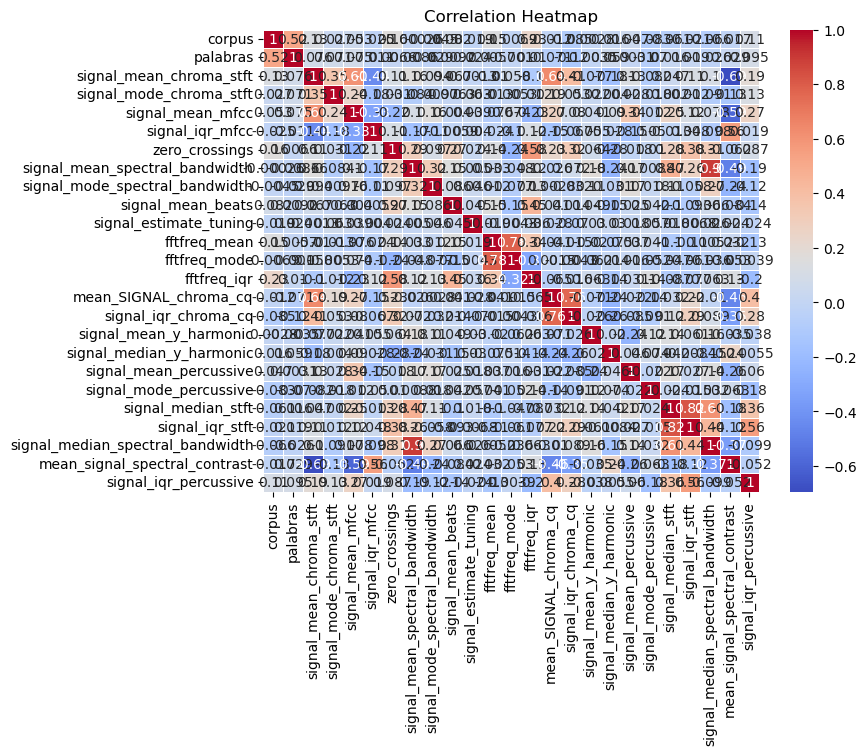

In [81]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [82]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

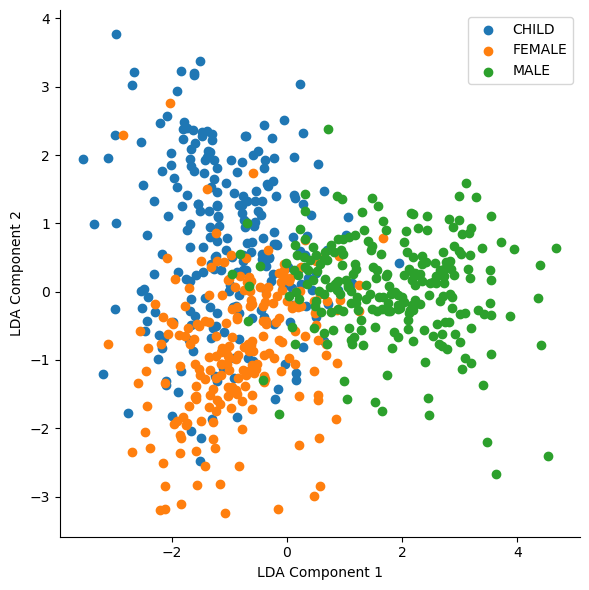

In [84]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

Indipendent Component Analysis 

In [85]:
data_numeric = df.select_dtypes(include=['number'])

In [86]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
ica = FastICA(n_components=4, random_state=42, whiten='unit-variance')
ica.fit(data_scaled)
independent_components = ica.transform(data_scaled)

print("Primeras componentes independientes:")
print(independent_components[:, :4])

Primeras componentes independientes:
[[-0.34704481 -1.01801498  0.24487733 -0.29909561]
 [-0.08417596 -0.07548449 -0.01512401  0.79740197]
 [ 0.10687259  0.27938105  0.20322489  1.80630369]
 ...
 [-0.51126859 -1.73164881 -0.33617554  0.5912543 ]
 [-0.87824362 -0.80746601 -1.1385023   0.96190268]
 [ 0.91094131 -0.04529881 -0.44305594  0.9820423 ]]


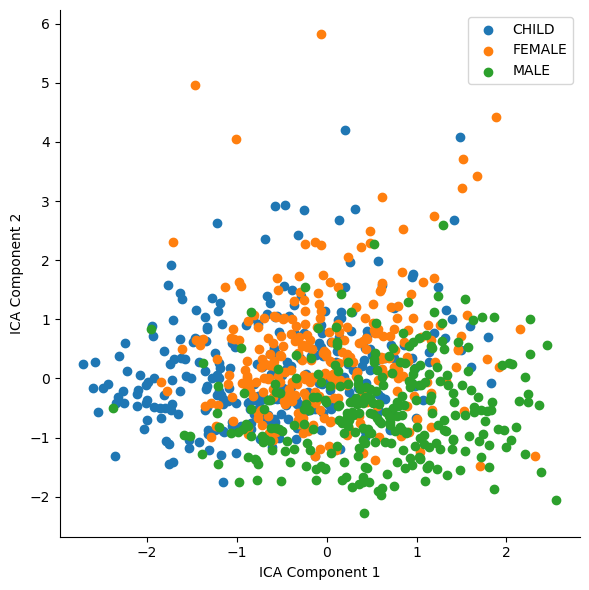

In [87]:
tmp_Df = pd.DataFrame(independent_components[:,0:2], columns=['ICA Component 1','ICA Component 2'])
tmp_Df['Class']=y

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'ICA Component 1',
                              'ICA Component 2')

plt.legend(loc='upper right')

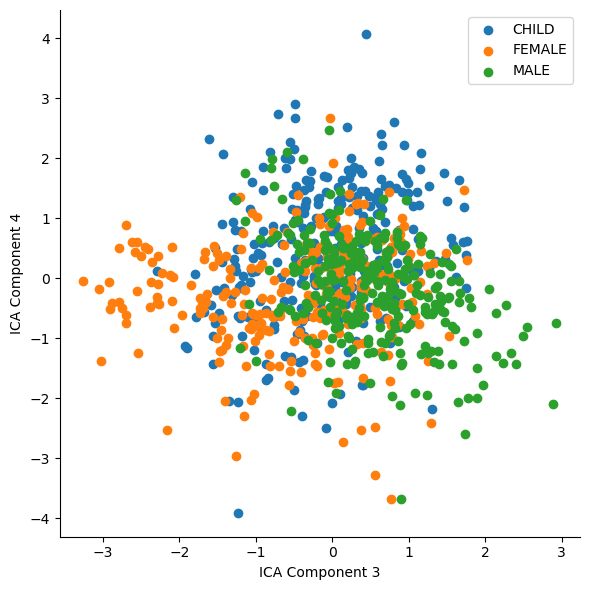

In [88]:
tmp_Df = pd.DataFrame(independent_components[:,2:4], columns=['ICA Component 3','ICA Component 4'])
tmp_Df['Class']=y

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'ICA Component 3',
                              'ICA Component 4')

plt.legend(loc='upper right')

#### test RandomForest LCA

In [153]:
classifier = RandomForestClassifier(max_depth=5, random_state=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)




Accuracy: 0.70
              precision    recall  f1-score   support

       CHILD       0.68      0.56      0.62        50
      FEMALE       0.66      0.63      0.65        71
        MALE       0.75      0.92      0.83        52

    accuracy                           0.70       173
   macro avg       0.70      0.71      0.70       173
weighted avg       0.69      0.70      0.69       173



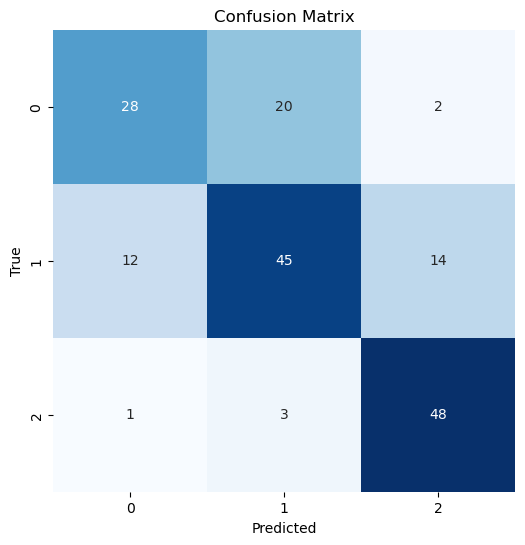

In [139]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)



#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### test RandomForest PCA

In [110]:
#Preprocess Data
tmp_Df_pca = pd.DataFrame(components[:,0:4], columns= {str(i): f"PC {i+1}" for i in range(4)})
tmp_Df_pca['Class']=y_description



# Divide the data set into features (X) and target variable (y)
X_pca = tmp_Df_pca.iloc[:, 0:4].values
y_pca = tmp_Df_pca.iloc[:, 4].values

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)



In [111]:
classifier_pca = RandomForestClassifier(max_depth=6, random_state=5)
classifier_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = classifier_pca.predict(X_test_pca)



Accuracy: 0.61
              precision    recall  f1-score   support

       CHILD       0.54      0.37      0.44        57
      FEMALE       0.56      0.74      0.64        54
        MALE       0.70      0.71      0.70        62

    accuracy                           0.61       173
   macro avg       0.60      0.61      0.59       173
weighted avg       0.60      0.61      0.60       173



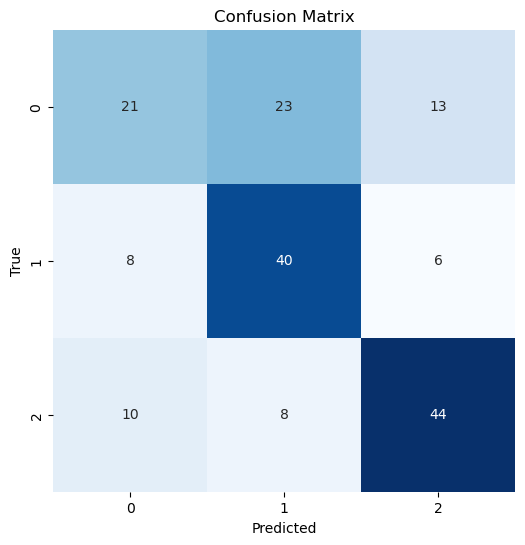

In [126]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
conf_m_pca = confusion_matrix(y_test_pca, y_pred_pca)

#Display the accuracy
print(f'Accuracy: {accuracy_pca:.2f}')

print(classification_report(y_test_pca, y_pred_pca))


#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_pca, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### test RandomForest ICA


In [107]:
#Preprocess Data
tmp_Df_ica = pd.DataFrame(independent_components[:, :4], columns= {str(i): f"PC {i+1}" for i in range(4)})
tmp_Df_ica['Class']=y_description


# Divide the data set into features (X) and target variable (y)
X_ica = tmp_Df_ica.iloc[:, 0:4].values
y_ica = tmp_Df_ica.iloc[:, 4].values

X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y_ica, test_size=0.2)


In [114]:
classifier_ica = RandomForestClassifier(max_depth=6, random_state=5)
classifier_ica.fit(X_train_ica, y_train_ica)
y_pred_ica = classifier_ica.predict(X_test_ica)


Accuracy: 0.73
              precision    recall  f1-score   support

       CHILD       0.66      0.63      0.65        49
      FEMALE       0.72      0.74      0.73        62
        MALE       0.81      0.81      0.81        62

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173



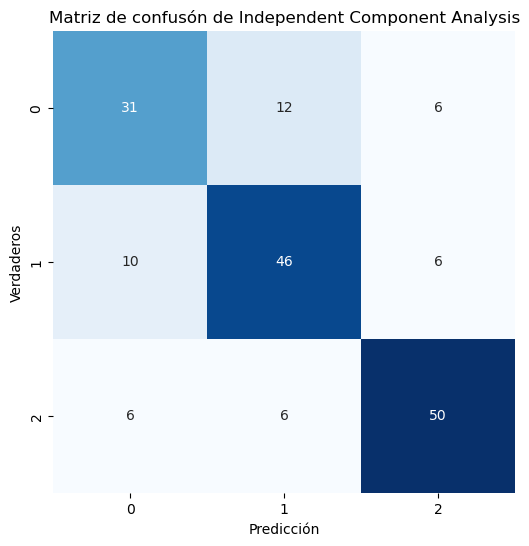

In [157]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_ica = accuracy_score(y_test_ica, y_pred_ica)
conf_m_ica = confusion_matrix(y_test_ica, y_pred_ica)

#Display the accuracy
print(f'Accuracy: {accuracy_ica:.2f}')
print(classification_report(y_test_ica, y_pred_ica))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_ica, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("Matriz de confusón de Independent Component Analysis")
plt.show()

### RANDOM FOREST ORIGINAL DATA

In [116]:
#Preprocess Data
dataset = df
# Divide the data set into features (X) and target variable (y)



# Divide the data set into features (X) and target variable (y)
X_ori = dataset.iloc[:, 1:-1].values
y_ori = dataset.iloc[:, 0].values

X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.2)

In [117]:
classifier_ori = RandomForestClassifier(max_depth=6, random_state=5)
classifier_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = classifier_ori.predict(X_test_ori)


Accuracy: 0.77
              precision    recall  f1-score   support

       CHILD       0.80      0.70      0.75        57
      FEMALE       0.75      0.78      0.76        67
        MALE       0.76      0.84      0.80        49

    accuracy                           0.77       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.77      0.77      0.77       173



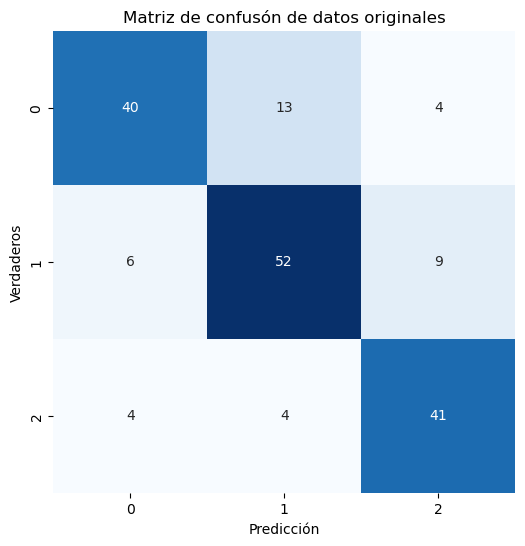

In [158]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_ori = accuracy_score(y_test_ori, y_pred_ori)
conf_m_ori = confusion_matrix(y_test_ori, y_pred_ori)

#Display the accuracy
print(f'Accuracy: {accuracy_ori:.2f}')

print(classification_report(y_test_ori, y_pred_ori))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_ori, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("Matriz de confusón de datos originales")
plt.show()

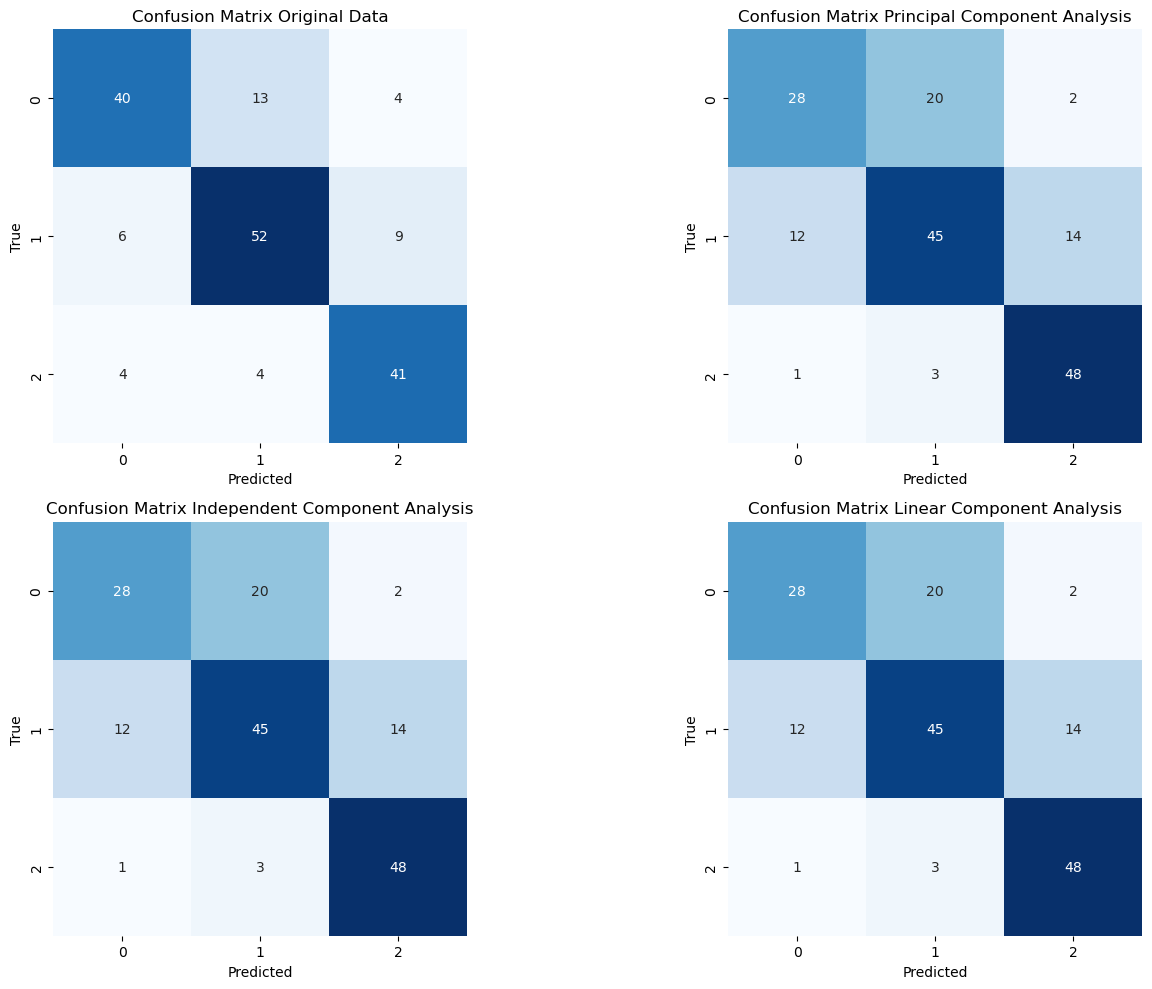

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))


ax=axes[0,0]
sns.heatmap(conf_m_ori, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Original Data")

ax=axes[0,1]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Principal Component Analysis")

ax=axes[1,0]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Independent Component Analysis")

ax=axes[1,1]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Linear Component Analysis")

plt.tight_layout()
plt.show()